In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.DataFrame({'x':[1,2,3,4,5,6,7,8,9,10],'y':[2,1,3,6,9,11,13,15,17,20]})
data

,x,y
0,1,2
1,2,1
2,3,3
3,4,6
4,5,9
5,6,11
6,7,13
7,8,15
8,9,17
9,10,20


In [3]:
std_x=data.x.std()
std_x

3.0276503540974917

In [4]:
std_y=data.y.std()
std_y

6.61731734835869

In [5]:
mean_x=data.x.mean()
mean_x

5.5

In [6]:
mean_y=data.y.mean()
mean_y

9.7

In [7]:
corr=np.corrcoef(data.x,data.y)
corr

array([[1.        , 0.98993808],
       [0.98993808, 1.        ]])

In [8]:
# b1=correlation*(std.dev of y/std. dev. of x)

In [9]:
b1=0.989938*(std_y/std_x)
b1

2.1636361980616496

In [10]:
# b0=mean(y)-b1*mean(x)

In [11]:
b0=mean_y-(b1*mean_x)
b0

-2.199999089339073

In [12]:
# regression equation
# 

In [13]:
import matplotlib.pyplot as plt

In [14]:
dataset=pd.read_csv('Salary_Data.csv')

In [15]:
dataset.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [16]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [17]:
Y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [18]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [19]:
# splitting the data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=21)

In [20]:
y_train

array([ 93940.,  54445., 112635.,  55794.,  81363., 116969.,  39343.,
        91738.,  60150.,  57081., 121872.,  56957.,  61111.,  64445.,
        63218.,  83088.,  37731.,  43525., 105582.,  66029.,  39891.,
       109431.,  67938.,  57189.])

In [21]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred=regressor.predict(X_test)
y_pred

array([ 52102.91433294, 102050.58797689,  99223.36116686, 121841.17564714,
        37024.37134609,  91684.08967343])

In [23]:
y_test-y_pred

array([ 4539.08566706, 11761.41202311,  2078.63883314,   549.82435286,
        9180.62865391,  6588.91032657])

In [24]:
print(regressor.score(X_test,y_test))

0.9398582853702572


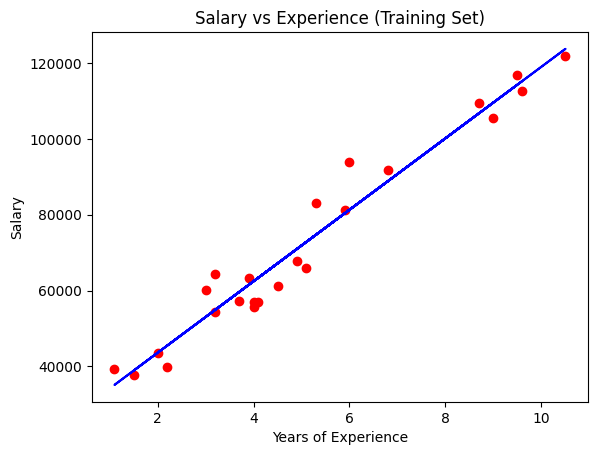

In [25]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train),color='blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()